New Analysis


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as psql

# Load the CSV dataset into a pandas DataFrame
df = pd.read_csv('athlete_events.csv')

# Define a function to execute SQL queries using pandasql
def execute_query(query):
    return psql.sqldf(query, globals())

# Run SQL queries using the defined function

table = execute_query("SELECT * FROM df")

Age analysis

In [3]:
query_avg_male_age = "SELECT AVG(Age) AS AvgMaleAge FROM df WHERE Sex = 'M';"
query_avg_female_age = "SELECT AVG(Age) AS AvgFemaleAge FROM df WHERE Sex = 'F';"
query_age_distribution = "SELECT Sex, AVG(Age) AS AvgAge, MIN(Age) AS MinAge, MAX(Age) AS MaxAge FROM df GROUP BY Sex;"

In [4]:
avg_male_age = execute_query(query_avg_male_age)
avg_female_age = execute_query(query_avg_female_age)
age_distribution = execute_query(query_age_distribution)





In [5]:
# Print the results
print("Average Male Age:")
print(avg_male_age)

print("\nAverage Female Age:")
print(avg_female_age)

print("\nAge Distribution by Gender:")
print(age_distribution)








Average Male Age:
   AvgMaleAge
0   26.277562

Average Female Age:
   AvgFemaleAge
0     23.732881

Age Distribution by Gender:
  Sex     AvgAge  MinAge  MaxAge
0   F  23.732881    11.0    74.0
1   M  26.277562    10.0    97.0


Noc analysis

In [6]:
query_num_of_medals_for_each_country = " Select noc, count(medal) as num_of_medals from df where medal is not null group by noc order by count(medal) desc limit 10"

In [7]:
num_of_medals_for_each_country= execute_query(query_num_of_medals_for_each_country)


In [8]:
num_of_medals_for_each_country

,NOC,num_of_medals
0,USA,5637
1,URS,2503
2,GER,2165
3,GBR,2068
4,FRA,1777
5,ITA,1637
6,SWE,1536
7,CAN,1352
8,AUS,1320
9,RUS,1165


Trend over time

In [9]:
time_query = """SELECT Year,
       COUNT(DISTINCT ID) AS AthleteCount,
       COUNT(DISTINCT Event) AS EventCount,
       COUNT(Medal) AS MedalCount
FROM df
Where medal is not null
GROUP BY Year
ORDER BY Year;
"""

In [10]:
trend_over_time= execute_query(time_query)


In [11]:
trend_over_time

,Year,AthleteCount,EventCount,MedalCount
0,1896,93,43,143
1,1900,469,89,604
2,1904,357,95,486
3,1906,365,74,458
4,1908,757,109,831
5,1912,824,107,941
6,1920,1074,156,1308
7,1924,832,147,962
8,1928,748,133,823
9,1932,662,140,739


Most popular sports 

In [12]:
popular_sports_query= """SELECT Sport, COUNT(DISTINCT ID) AS AthleteCount
FROM df
GROUP BY Sport
ORDER BY AthleteCount DESC
LIMIT 10;"""

In [13]:
popular_sports = execute_query(popular_sports_query)

In [14]:
popular_sports

,Sport,AthleteCount
0,Athletics,22071
1,Swimming,8765
2,Rowing,7687
3,Football,6161
4,Cycling,5819
5,Boxing,5262
6,Wrestling,4988
7,Shooting,4882
8,Sailing,4480
9,Gymnastics,4134


Gender Equality

In [15]:
gender_equailty_query= """SELECT Year,
       (COUNT(CASE WHEN Sex = 'F' THEN 1 END) * 100.0) / COUNT(*) AS FemalePercentage
FROM df
GROUP BY Year;"""

In [16]:
gender_equailty = execute_query(gender_equailty_query)

In [17]:
gender_equailty

,Year,FemalePercentage
0,1896,0.000000
1,1900,1.704545
2,1904,1.229823
3,1906,0.634737
4,1908,1.515640
5,1912,2.153465
6,1920,3.122088
7,1924,4.584578
8,1928,7.839971
9,1932,11.111111


Number of Athletes by Country



In [18]:
athletes_by_country_query = """SELECT NOC, COUNT(DISTINCT ID) AS AthleteCount
FROM df
GROUP BY NOC
ORDER BY AthleteCount Asc
LIMIT 10; """

In [19]:
ath_by_country = execute_query(athletes_by_country_query)

In [20]:
ath_by_country

,NOC,AthleteCount
0,NFL,1
1,NBO,2
2,UNK,2
3,SSD,3
4,YMD,5
5,TUV,6
6,CRT,8
7,KOS,8
8,TLS,8
9,BRU,9


medal density

In [57]:


medal_density_query= """
SELECT
    Year,
    NOC AS Country,
    IFNULL(COUNT(Medal) / NULLIF(COUNT(DISTINCT ID), 0), 0) AS MedalDensity
FROM
    df
WHERE
    Medal IS NOT NULL
GROUP BY
    Year, NOC
ORDER BY
    Year, NOC;
"""

In [58]:
 medal_density = execute_query(medal_density_query)

In [59]:
 medal_density

,Year,Country,MedalDensity
0,1896,AUS,3
1,1896,AUT,1
2,1896,DEN,3
3,1896,FRA,1
4,1896,GBR,1
...,...,...,...
1437,2016,UKR,1
1438,2016,USA,1
1439,2016,UZB,1
1440,2016,VEN,1


Age and Performance Correlation Insights:



In [24]:
age_performance_query= """SELECT
    AVG(Age) AS AverageAge,
    Medal
FROM
    df
WHERE
    Medal IS NOT NULL
GROUP BY
    Medal; """

In [25]:
age_performance = execute_query(age_performance_query)

In [26]:
age_performance

,AverageAge,Medal
0,25.879210,Bronze
1,25.901013,Gold
2,25.996724,Silver


Height and Weight Correlation

In [27]:
h_w_corr_query= """SELECT
    AVG(Height) AS AverageHeight,
    AVG(Weight) AS AverageWeight
FROM
    df;"""

In [28]:
h_w_corr = execute_query(h_w_corr_query)

In [29]:
h_w_corr 

,AverageHeight,AverageWeight
0,175.33897,70.702393


Avg age plot

In [30]:
import matplotlib.pyplot as plt
average_age_by_event = df.groupby('Sex')['Age'].mean().reset_index()



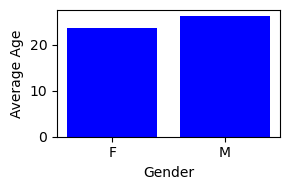

In [70]:
plt.figure(figsize=(3, 2))
plt.bar(average_age_by_event['Sex'], average_age_by_event['Age'], color='blue')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.title('')
plt.tight_layout()
plt.show()






Num of medal for each country plot

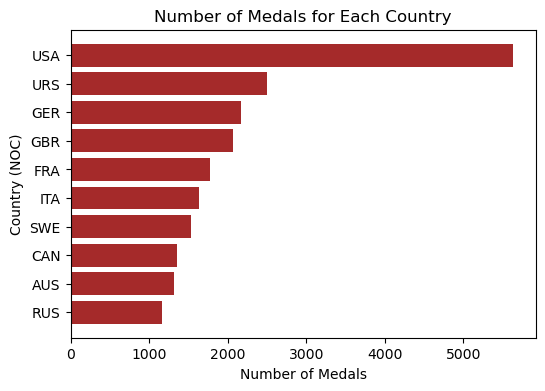

In [32]:
plt.figure(figsize=(6, 4))
plt.barh(num_of_medals_for_each_country['NOC'], num_of_medals_for_each_country['num_of_medals'], color='brown')
plt.xlabel('Number of Medals')
plt.ylabel('Country (NOC)')
plt.title('Number of Medals for Each Country')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()


Medal desnsity for usa plot

In [33]:
country_to_plot = 'AUS'
country_data =  medal_density[ medal_density['Country'] == country_to_plot]

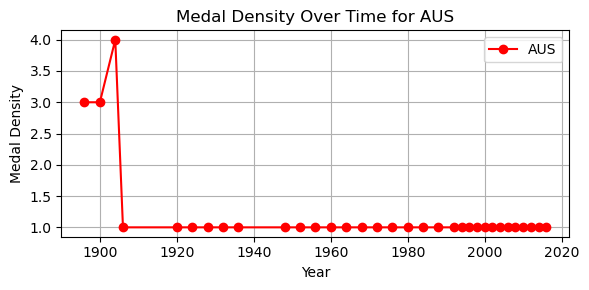

In [44]:
plt.figure(figsize=(6, 3))
plt.plot(country_data['Year'], country_data['MedalDensity'], marker='o', color='r', label=country_to_plot)
plt.xlabel('Year')
plt.ylabel('Medal Density')
plt.title(f'Medal Density Over Time for {country_to_plot}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

gender_equality_plot

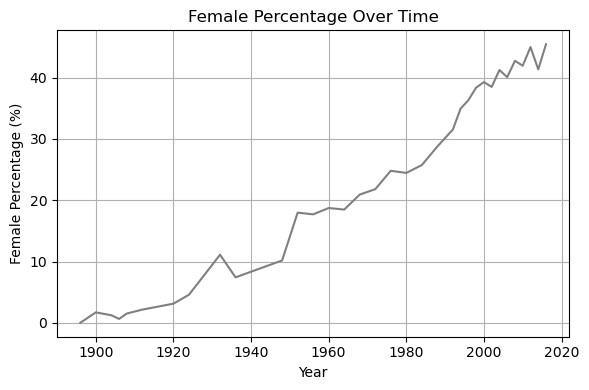

In [62]:
plt.figure(figsize=(6, 4))
plt.plot(gender_equailty['Year'], gender_equailty['FemalePercentage'], color='gray')
plt.xlabel('Year')
plt.ylabel('Female Percentage (%)')
plt.title('Female Percentage Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


Height distribuation for each sport type

In [89]:
selected_sports = ['Athletics', 'Swimming', 'Gymnastics', 'Cycling', 'Basketball']
filtered_df = df[df['Sport'].isin(selected_sports)]

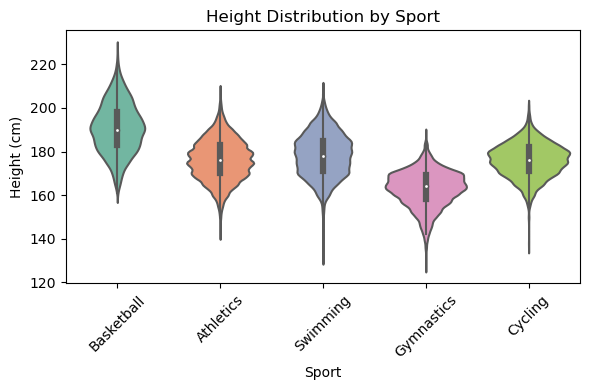

In [91]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Sport', y='Height', data=filtered_df, palette='Set2')
plt.title('Height Distribution by Sport')
plt.xlabel('Sport')
plt.ylabel('Height (cm)')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Correlation beteen age groups and number of medals

In [100]:
age_group_query = """SELECT Age as Agegroup,
       COUNT(Medal) AS MedalCount
FROM df
Where medal is not null and age is not null
GROUP BY Age
ORDER BY Age;
"""

age_groups = execute_query(age_group_query)
age_groups

,Agegroup,MedalCount
0,10.0,1
1,11.0,1
2,12.0,6
3,13.0,16
4,14.0,75
...,...,...
56,68.0,2
57,69.0,2
58,71.0,2
59,72.0,2


In [107]:
import scipy.stats as stats
AgeGroup = df.groupby('Age')['Medal'].count().reset_index()
pearson_corr, _ = stats.pearsonr(AgeGroup['Age'], AgeGroup['Medal'])
pearson_corr

-0.520713171606261